In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cycler

In [3]:
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])

plt.rc('figure',facecolor='#313233')
plt.rc('axes', facecolor='#313233', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color = 'gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor='#313233', edgecolor='#313233')
plt.rc('text', color='#C9C9C9')

In [4]:
def preprocessing(name):
  df = pd.read_csv(name, delimiter="\t", index_col="<DATE>", parse_dates=True)
  df = df.iloc[:,:-2]
  df.columns = ["open", "high", "low", "close", "volume"]
  df.index.name="time"
  return df

In [5]:
def preprocessing_yf(symbol):
  df = yf.download(symbol)
  df.columns=["open", "high", "low", "close", "adj close", "volulme"]
  df.index.name="time"
  del df["adj close"]
  return df

In [6]:
df = preprocessing_yf("BZ=F")
df["SMA fast"] = df["close"].rolling(30).mean()
df["SMA slow"] =df["close"].rolling(60).mean()
df

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,volulme,SMA fast,SMA slow
time,,,,,,,
2007-07-30,75.849998,76.529999,75.440002,75.739998,2575,NaN,NaN
2007-07-31,75.699997,77.169998,75.669998,77.050003,3513,NaN,NaN
2007-08-01,77.000000,77.059998,74.860001,75.349998,3930,NaN,NaN
2007-08-02,75.220001,76.209999,74.269997,75.760002,6180,NaN,NaN
2007-08-03,75.389999,76.000000,74.529999,74.750000,4387,NaN,NaN
...,...,...,...,...,...,...,...
2023-01-30,86.800003,87.370003,84.750000,84.900002,5879,83.300667,85.134833
2023-01-31,85.160004,85.160004,83.690002,84.489998,30498,83.482334,84.965167
2023-02-01,85.519997,86.199997,82.370003,82.839996,28085,83.583667,84.703000


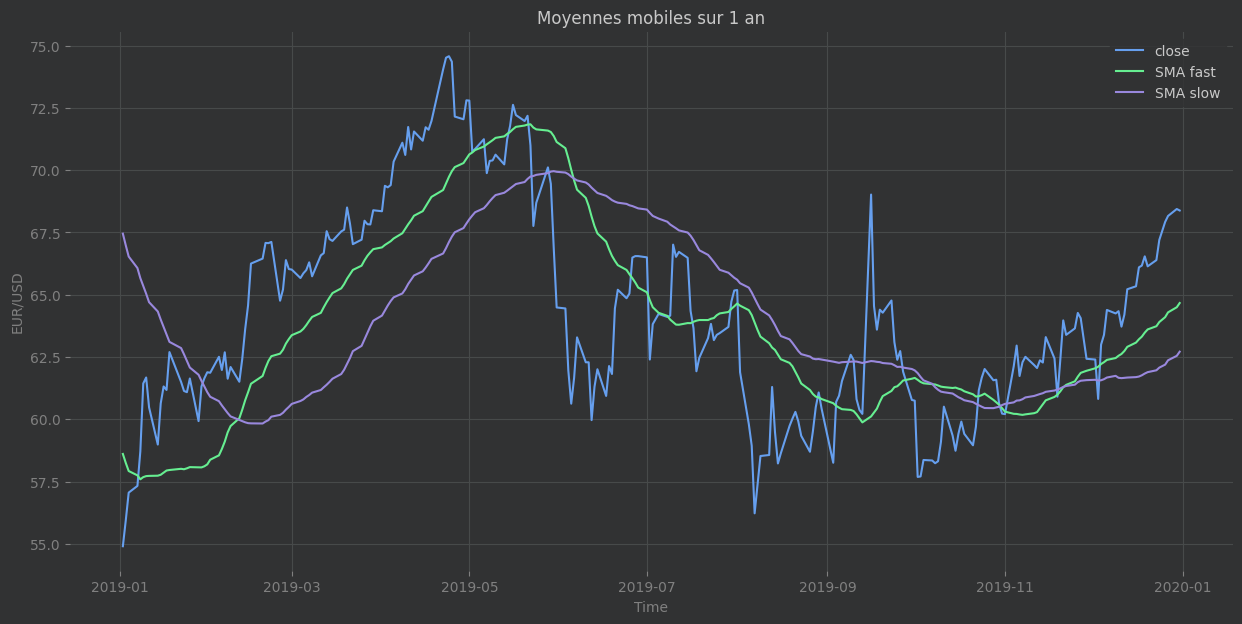

In [7]:
plt.figure(figsize=(15,7))
plt.xlabel("Time")
plt.ylabel("EUR/USD")

plt.title("Moyennes mobiles sur 1 an")
plt.plot(df[["close", "SMA fast", "SMA slow"]].loc["2019"])
plt.legend(["close", "SMA fast", "SMA slow"])
plt.show()

In [8]:
df["position"] = np.nan

df.loc[(df["SMA fast"]>df["SMA slow"]), "position"]=1
df.loc[(df["SMA fast"]<df["SMA slow"]), "position"]=-1


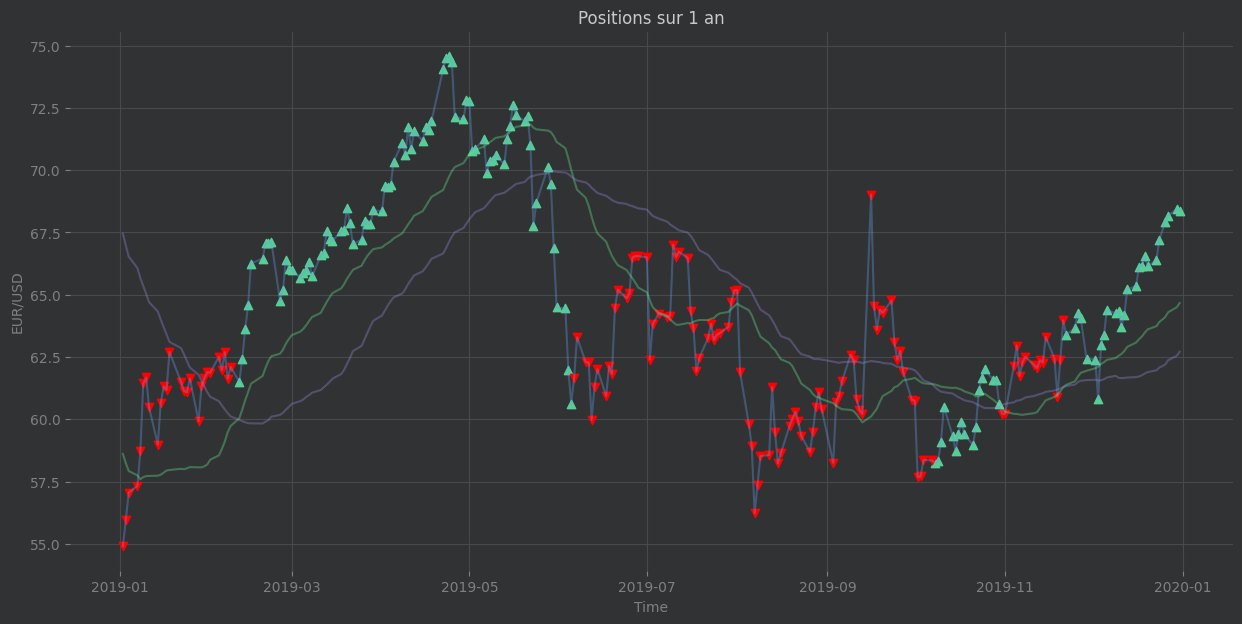

In [9]:
year = "2019"
idx_buy = df.loc[df["position"]==1].loc[year].index
idx_sell = df.loc[df["position"]==-1].loc[year].index
plt.figure(figsize=(15,7))
plt.scatter(idx_buy, df.loc[idx_buy]["close"].loc[year], color= "#57CE95", marker="^")
plt.scatter(idx_sell, df.loc[idx_sell]["close"].loc[year], color= "red", marker="v")

plt.plot(df["close"].loc[year].index, df["close"].loc[year], alpha=0.35)
plt.plot(df["close"].loc[year].index, df["SMA fast"].loc[year], alpha=0.35)
plt.plot(df["close"].loc[year].index, df["SMA slow"].loc[year], alpha=0.35)

plt.legend=["achat", "vente","close", "SMA fast", "SMA slow"]
plt.xlabel("Time")
plt.ylabel("EUR/USD")

plt.title("Positions sur 1 an")

plt.show()

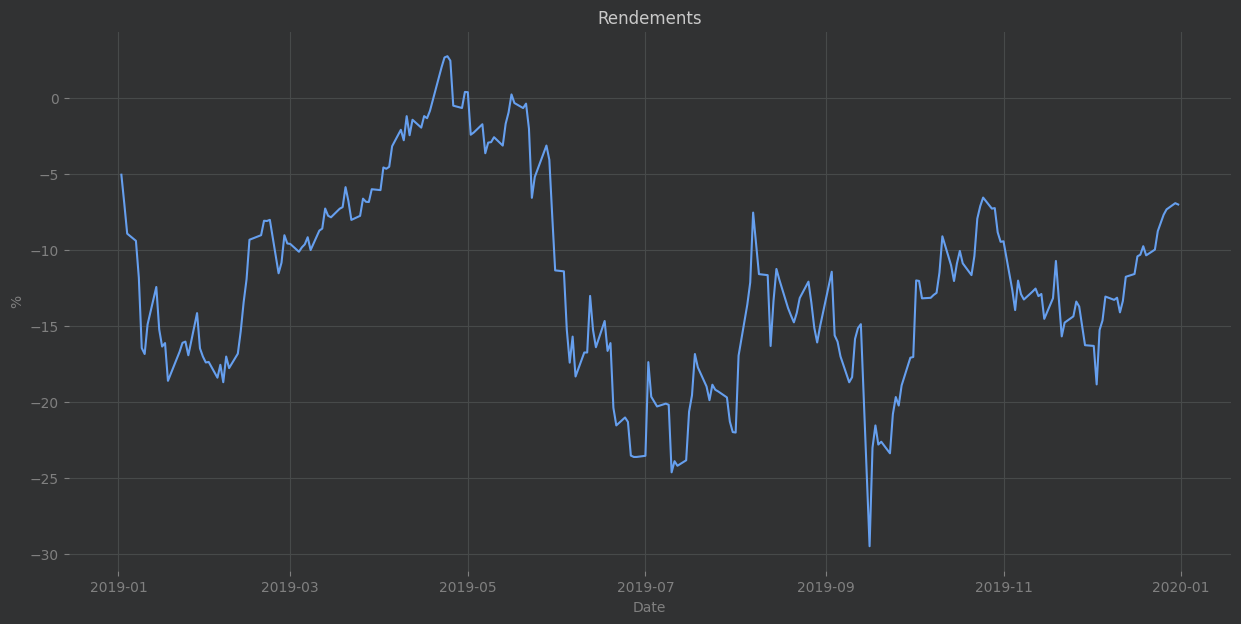

In [11]:
df["pct"] = df["close"].pct_change(1)
df["return"] = df["pct"] * df["position"].shift(1)

plt.figure(figsize=(15,7))
plt.xlabel("Date")
plt.ylabel("%")
plt.title("Rendements")
plt.plot((df["return"].loc[year]*100).cumsum())

plt.show()

